# Importing the libraries

In [208]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Problem statement

The problem statement is to develop a model that accurately predicts the prices of used cars based on their features, such as the car's brand, model, year of manufacture, mileage, and other relevant attributes.

The goal is to build a reliable pricing tool that assists both buyers and sellers in making informed decisions in the used car market.

# Importing the Dataset

Link: https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv

In [209]:
df = pd.read_csv('https://raw.githubusercontent.com/sahilrahman12/Price_prediction_of_used_Cars_-Predictive_Analysis-/master/car_data.csv')

# Data Analysis & EDA

Perform initial data exploration to understand the dataset.

In [210]:
dfc = df.copy()

In [211]:
df.head()
# Display the first few rows of the DataFrame

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [212]:
# Display the last few rows of the DataFrame.
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


In [213]:
# Check the number of dimensions of the DataFrame.
df.ndim

2

In [214]:
# Get the number of rows and columns in the DataFrame.
df.shape

(4340, 8)

In [215]:
# List all column names in the DataFrame.
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [216]:
# Generate descriptive statistics of the numerical columns.
df.describe()

,year,selling_price,km_driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [217]:
# Display a summary of the DataFrame, including data types and non-null values.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [218]:
# unique values in fuel column
df['fuel'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric'], dtype=object)

In [219]:
# count of unique values in fuel column
# df['fuel'].unique().size
df['fuel'].nunique()
# len(df['fuel'].unique())

5

In [220]:
# unique values in seller_type column
df['seller_type'].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [221]:
# count of unique values in seller_type column
df['seller_type'].nunique()

3

In [222]:
# unique values in transmission column
df['transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [223]:
# count of unique values in transmission column
df['transmission'].nunique()

2

In [224]:
# unique values in owner column
df['owner'].unique()

array(['First Owner', 'Second Owner', 'Fourth & Above Owner',
       'Third Owner', 'Test Drive Car'], dtype=object)

In [225]:
# count of unique values in owner column
df['owner'].nunique()

5

In [226]:
# Create a column new_fuel and place it at index of the fuel column
# Replace the values:
# Petrol - 0
# Diesel - 1
# CNG - 2
# LPG - 3
# Electric - 4

new_fuel = df['fuel'].replace({'Petrol':0,'Diesel':1,'CNG':2,'LPG':3,'Electric':4})


In [227]:
df.insert(4,column='new_fuel',value=new_fuel)

In [228]:
df.new_fuel.value_counts()

,count
new_fuel,
1,2153
0,2123
2,40
3,23
4,1


In [229]:
df.new_fuel.unique()

array([0, 1, 2, 3, 4])

In [230]:
df.columns.get_loc("seller_type") # to know loc of a column in a df can be used in insert for loc value

6

In [231]:
# Create a column new_seller_type and place it at index of the seller_type column
# Replace the values:
# Individual - 0
# Dealer - 1
# Trustmark Dealer - 2

new_seller_type = df.seller_type.replace({'Individual':0,'Dealer':1,'Trustmark Dealer':2})
df.insert(loc=6,column='new_seller_type',value=new_seller_type)

In [232]:
df.new_seller_type.value_counts()

,count
new_seller_type,
0,3244
1,994
2,102


In [233]:
df.head()

,name,year,selling_price,km_driven,new_fuel,fuel,new_seller_type,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,0,Petrol,0,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,0,Petrol,0,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,Diesel,0,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,0,Petrol,0,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,Diesel,0,Individual,Manual,Second Owner


Feature Engineering :- Encoding categorical data as done above for fuel and seller type

In [234]:
# taking back to original dataset by dropping new_fuel and new_seller_type
df.drop(columns=['new_fuel','new_seller_type'],inplace=True)

In [235]:
df.head(4)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner


In [236]:
from sklearn.preprocessing import LabelEncoder

Applying Label Encoding to use categorical data from df in model development

In [237]:
df['fuel'] = LabelEncoder().fit_transform(df['fuel'])
df['seller_type'] = LabelEncoder().fit_transform(df['seller_type'])
df['transmission'] = LabelEncoder().fit_transform(df['transmission'])
df['owner'] = LabelEncoder().fit_transform(df['owner'])

In [238]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [239]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [240]:
from sklearn.preprocessing import OneHotEncoder

# categ_col = df.select_dtypes(include=['object']).columns.to_list()
categ_col = ['fuel','seller_type','transmission','owner']

In [241]:
encoder = OneHotEncoder(sparse_output=False)

In [242]:
encoded_col = encoder.fit_transform(dfc[categ_col])

In [243]:
categ_df = pd.DataFrame(data=encoded_col,columns=encoder.get_feature_names_out(categ_col))

In [244]:
categ_df.head()

,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [245]:
enc_df = pd.concat([dfc,categ_df],axis=1)

In [246]:
enc_df.drop(columns=categ_col,inplace=True)

In [247]:
enc_df.head()

,name,year,selling_price,km_driven,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,Maruti 800 AC,2007,60000,70000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,Maruti Wagon R LXI Minor,2007,135000,50000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,Hyundai Verna 1.6 SX,2012,600000,100000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
3,Datsun RediGO T Option,2017,250000,46000,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
4,Honda Amaze VX i-DTEC,2014,450000,141000,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


We will use label encoding in this model training

In [248]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,4,1,1,0
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2


In [249]:
# adding a new column current_year in the df where it is set to 2024
df['current_year'] = 2024

In [250]:
# create a new column named no_of_years which is the current_year - year
df['no_of_years'] = df['current_year'] - df['year']

In [251]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,current_year,no_of_years
0,Maruti 800 AC,2007,60000,70000,4,1,1,0,2024,17
1,Maruti Wagon R LXI Minor,2007,135000,50000,4,1,1,0,2024,17
2,Hyundai Verna 1.6 SX,2012,600000,100000,1,1,1,0,2024,12
3,Datsun RediGO T Option,2017,250000,46000,4,1,1,0,2024,7
4,Honda Amaze VX i-DTEC,2014,450000,141000,1,1,1,2,2024,10


In [252]:
# Drop columns - name, year, curent_year
# Rename selling_price to current_selling_price
df.drop(columns=['name','year','current_year'],inplace=True)
df.rename(columns={'selling_price':'current_selling_price'},inplace=True)

In [253]:
df.head()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
0,60000,70000,4,1,1,0,17
1,135000,50000,4,1,1,0,17
2,600000,100000,1,1,1,0,12
3,250000,46000,4,1,1,0,7
4,450000,141000,1,1,1,2,10


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   current_selling_price  4340 non-null   int64
 1   km_driven              4340 non-null   int64
 2   fuel                   4340 non-null   int64
 3   seller_type            4340 non-null   int64
 4   transmission           4340 non-null   int64
 5   owner                  4340 non-null   int64
 6   no_of_years            4340 non-null   int64
dtypes: int64(7)
memory usage: 237.5 KB


In [255]:
df.corr()

,current_selling_price,km_driven,fuel,seller_type,transmission,owner,no_of_years
current_selling_price,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840,-0.413922
km_driven,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115,0.419688
fuel,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910,0.120002
seller_type,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681,0.098352
transmission,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893,0.143800
owner,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000,0.414705
no_of_years,-0.413922,0.419688,0.120002,0.098352,0.143800,0.414705,1.000000


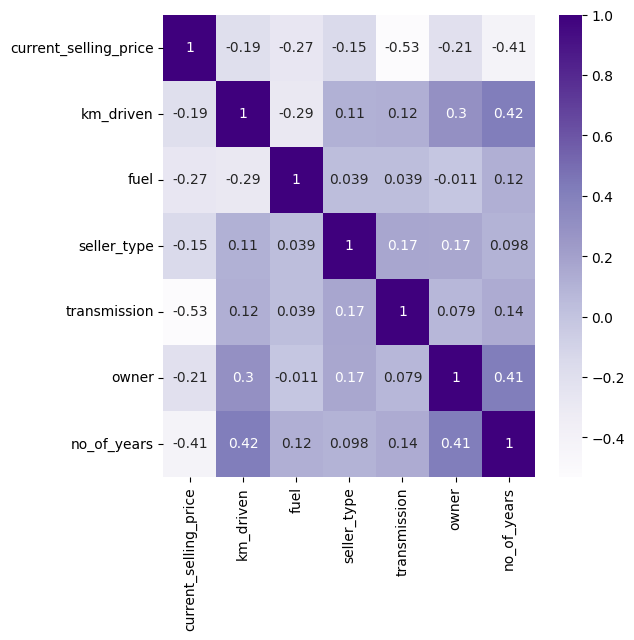

In [256]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True,cmap='Purples')
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


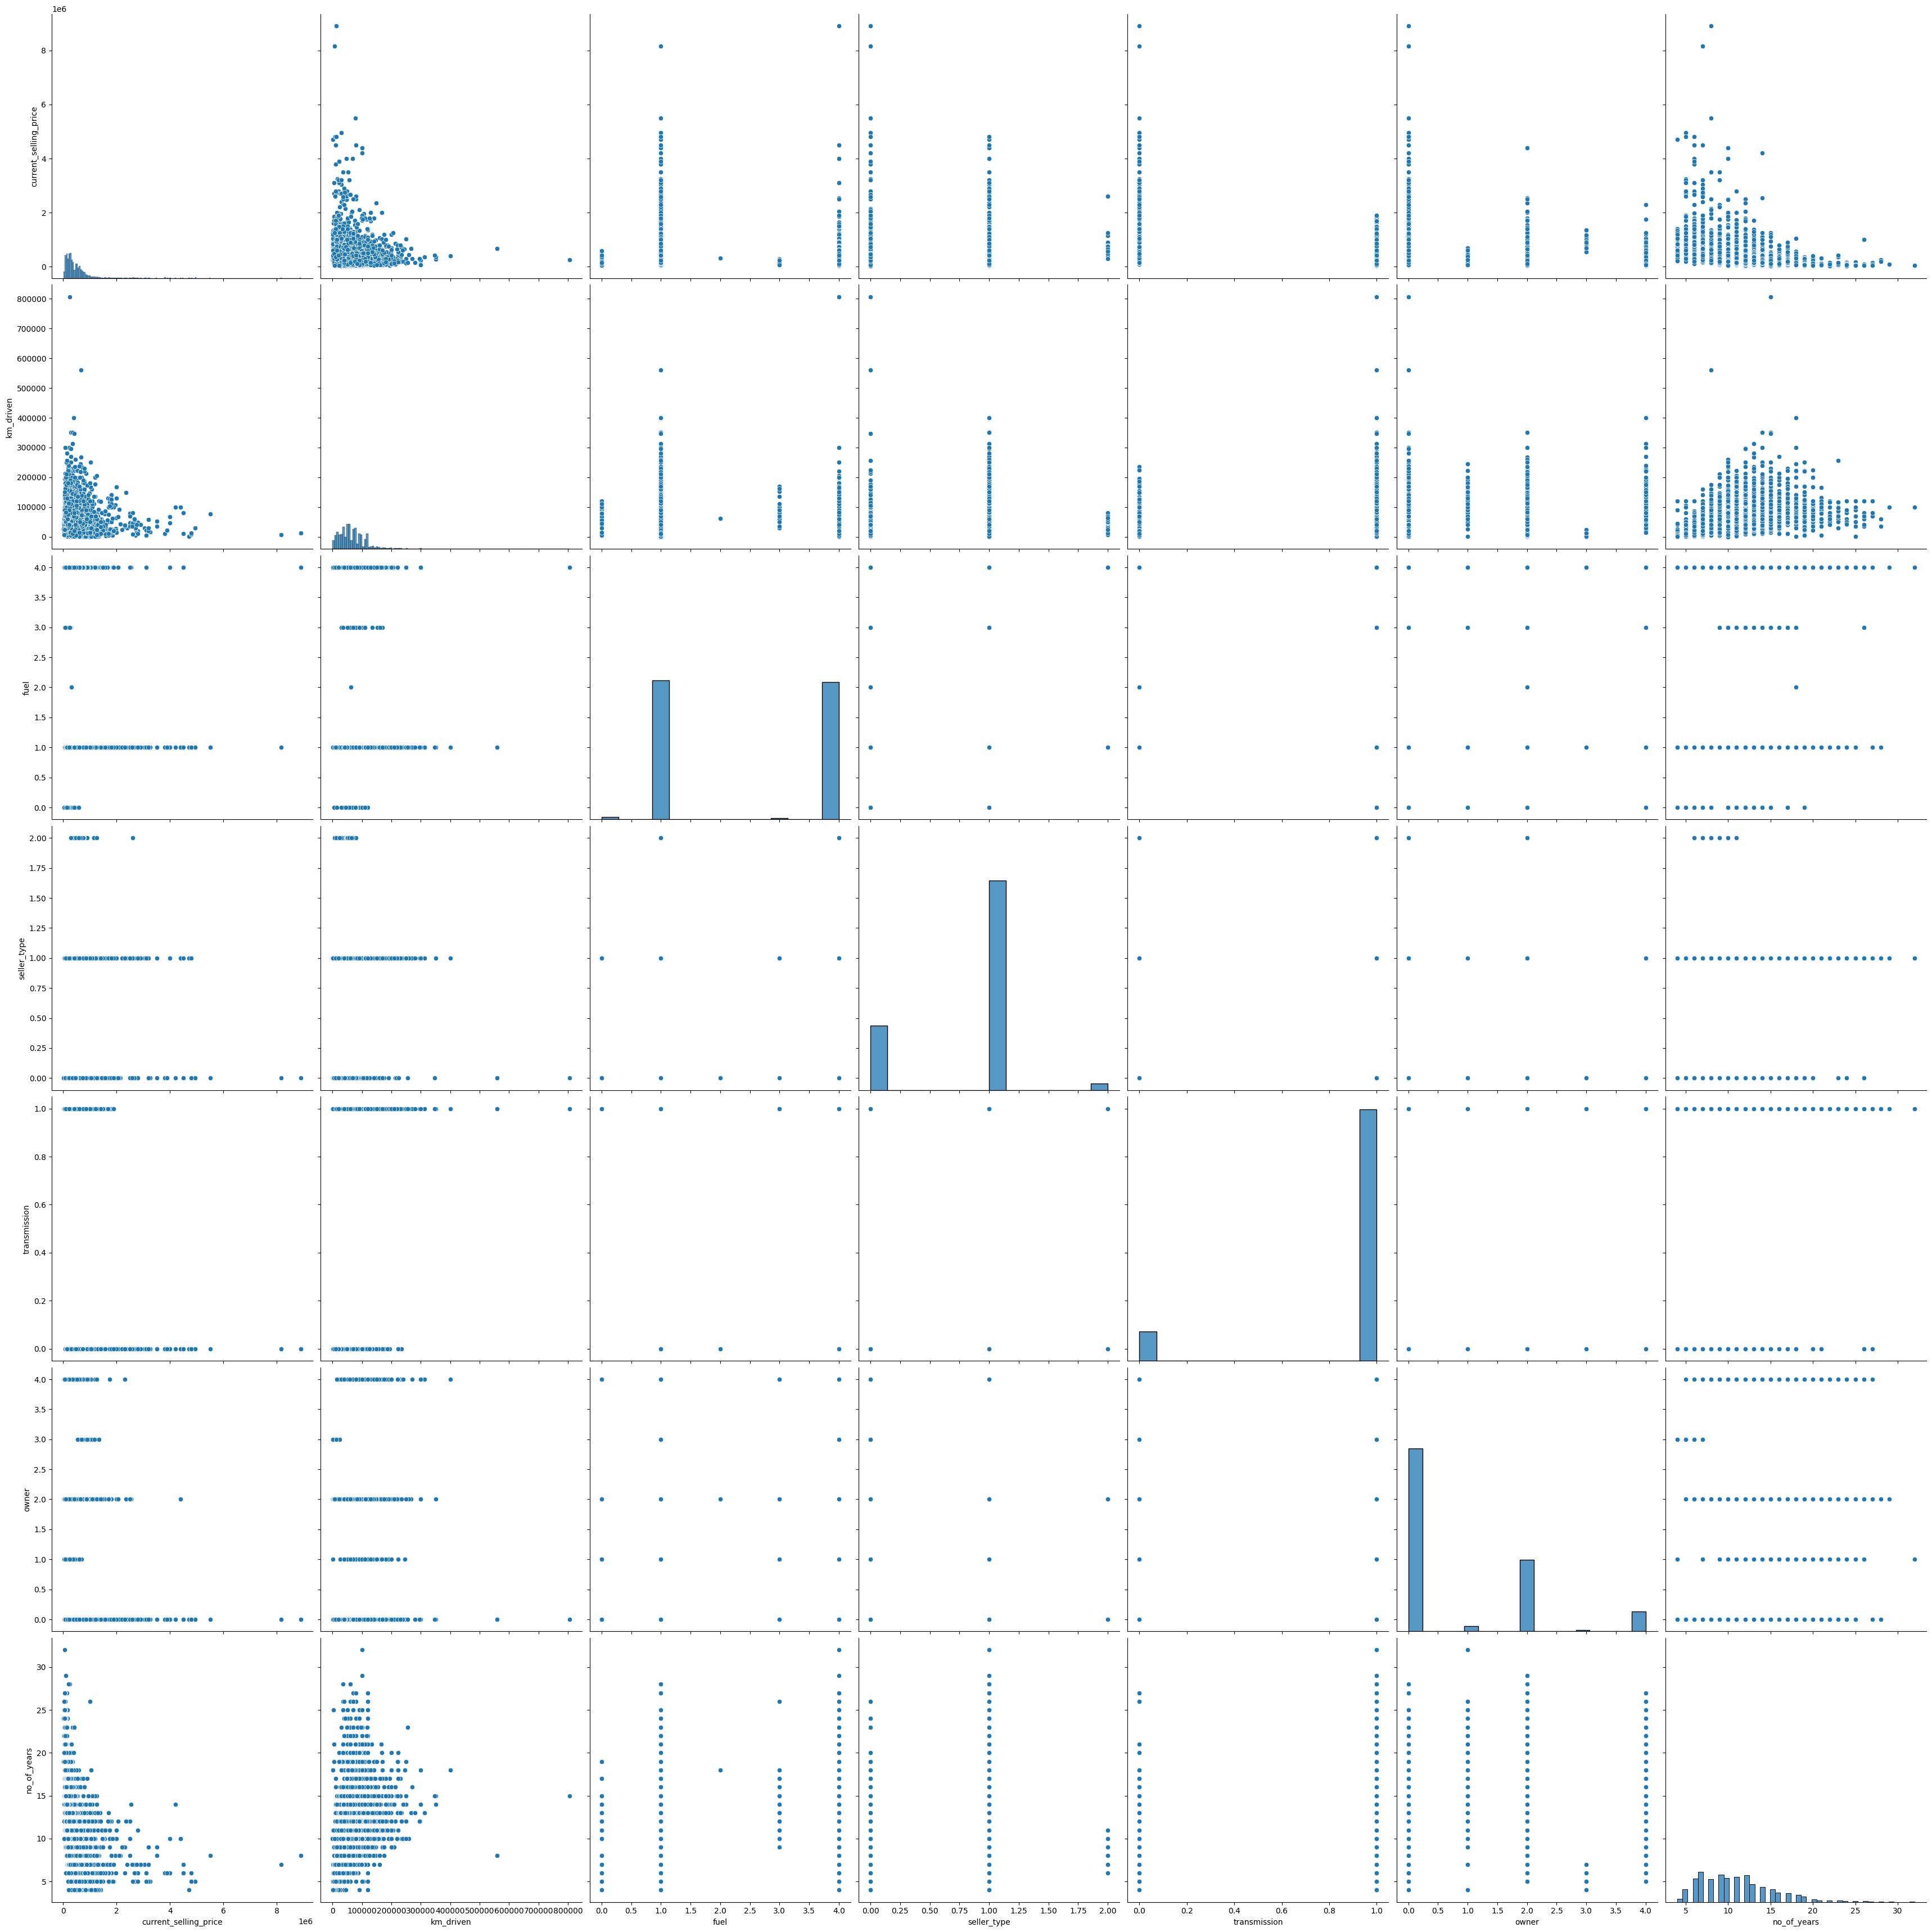

In [257]:
sns.pairplot(df,size=5)
plt.show()

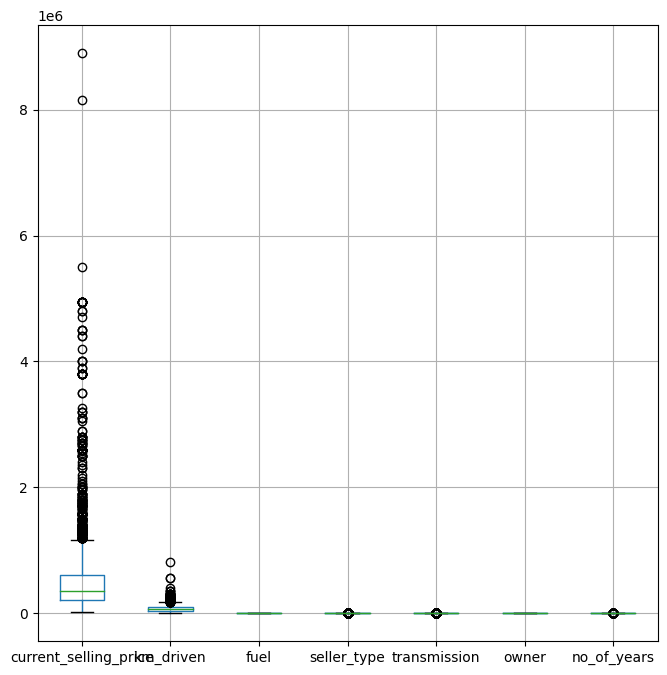

In [258]:
plt.figure(figsize=(8,8))
df.boxplot()
plt.show()

# Select the features and targets

In [259]:
len(df.columns)

7

In [260]:
x = np.array(df.drop(columns=['current_selling_price']).values).reshape(-1,6)
y = np.array(df['current_selling_price'].values).reshape(-1,1)

# Feature Scaling

In [263]:
from sklearn.preprocessing import StandardScaler

In [264]:
stanscale = StandardScaler()

In [265]:
x = stanscale.fit_transform(x)
y = stanscale.fit_transform(y)

# Spliting the data

In [267]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [268]:
print(len(x_train))
print(len(x_test))
print(len(y_train))
print(len(y_test))

3472
868
3472
868


# Choosing the model

In [272]:
regressor = DecisionTreeRegressor()

# Training the model

In [273]:
regressor.fit(x_train,y_train)

DecisionTreeRegressor()

# Testing the model

In [274]:
y_pred = regressor.predict(x_test)

In [275]:
y_test = stanscale.inverse_transform(y_test)
y_pred = stanscale.inverse_transform(y_pred.reshape(-1,1))

In [281]:
y_pred = np.round(y_pred,1)

In [282]:
# create a target named dataframe for comparing actual and predicted values
target = pd.DataFrame({'Actual':y_test.flatten(),'Predicted':y_pred.flatten()})

In [283]:
target

,Actual,Predicted
0,165000.0,150000.0
1,250000.0,280000.0
2,120000.0,120000.0
3,450000.0,450000.0
4,730000.0,969999.0
...,...,...
863,130000.0,116666.7
864,350000.0,550000.0
865,150000.0,200000.0
866,650000.0,315000.0


In [284]:
x_test = stanscale.inverse_transform(x_test)

# construct a scatter plot that shows the actual and predicted values w.r.t x_test

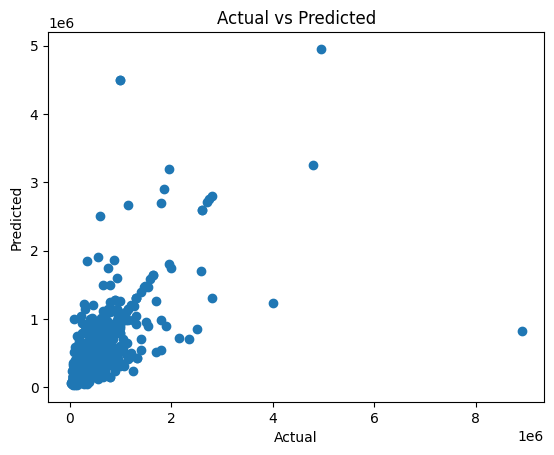

In [291]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

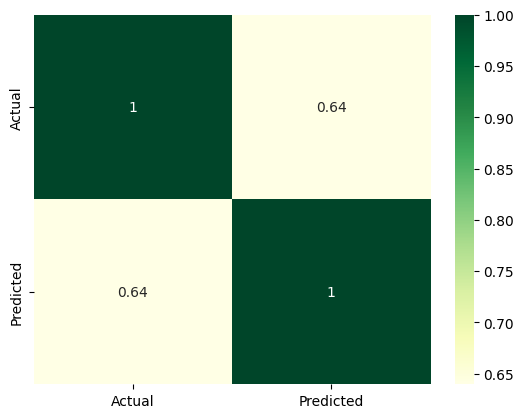

In [296]:
sns.heatmap(target.corr(),annot=True,cmap='YlGn')
plt.show()

# Performance

In [297]:
r2_score(y_test,y_pred)

0.3530883394022971

In [300]:
regressor.score(x_test,y_test)

-0.7853829172983064

In [298]:
mean_squared_error(y_test,y_pred)

197418216536.03506

In [301]:
mean_absolute_error(y_test,y_pred)

183217.56785714286